<a href="https://www.kaggle.com/code/nils123444/data-exploration-clustering-regression?scriptVersionId=193448701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# helper functions: 
import matplotlib.pyplot as plt 

def add_labels_top_of_barchart(x, y):
    """
    Fügt Beschriftungen oben an den Balken eines Balkendiagramms hinzu.

    Parameter:
    -----------
    x : list oder array
        Die x-Werte (Kategorien) der Balken im Diagramm.
    y : list oder array
        Die y-Werte (Höhen) der Balken, die beschriftet werden sollen.
    """
    # Rundet die y-Werte auf zwei Dezimalstellen
    y = y.round(2)
    # Fügt für jeden Balken eine Textbeschriftung hinzu
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # 'ha' steht für horizontale Ausrichtung ('center' zentriert den Text über dem Balken)

def add_label_stacked_bar_chart(axis): 
    """
    Fügt Beschriftungen zu einem gestapelten Balkendiagramm hinzu.

    Parameter:
    -----------
    axis : matplotlib.axis.Axis
        Die Achse, die das gestapelte Balkendiagramm enthält.
    """
    # Iteriert über alle Balkensegmente im Diagramm
    for c in axis.containers:

        # Optional: Wenn das Segment klein oder 0 ist, wird das Label angepasst
        labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
        
        # Fügt die Labels in der Mitte jedes Balkensegments hinzu
        axis.bar_label(c, labels=labels, label_type='center')


# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
import numpy as np 
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, labels=None, **kwargs):
    """
    Erstellt und visualisiert ein Dendrogramm basierend auf einem hierarchischen Clustering-Modell.

    Diese Funktion generiert eine Verknüpfungsmatrix (linkage matrix) aus einem gegebenen 
    hierarchischen Clustering-Modell und verwendet diese, um ein Dendrogramm zu plotten, das die 
    hierarchische Struktur der Cluster visualisiert.

    Parameter:
    -----------
    model : sklearn.cluster._agglomerative.AgglomerativeClustering
        Das trainierte hierarchische Clustering-Modell, das die Informationen über die 
        Clusterzusammenführungen enthält.
    
    labels : list, optional
        Eine Liste von Beschriftungen, die den einzelnen Datenpunkten entsprechen. Diese werden im 
        Dendrogramm angezeigt. Standardmäßig werden die Indizes der Datenpunkte verwendet, wenn keine 
        Labels angegeben sind.

    **kwargs : dict
        Zusätzliche Argumente, die an die `dendrogram`-Funktion von SciPy weitergegeben werden. 
        Diese können verwendet werden, um das Aussehen und Verhalten des Dendrogramms anzupassen.

    Returns:
    --------
    None
        This function plots the dendrogram directly using matplotlib and does not return any value.
    """
    
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=labels, **kwargs)


# 1. Data exploration and cleansing

In [2]:
import pandas as pd

# Path of the file in the same folder 
path = r"/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv"

df = pd.read_csv(path, index_col=0)
df.head(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Sort data by Winpercent 
df.sort_values("winpercent", ascending=False)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988


In [4]:
print("Shape:", df.shape)

Shape: (85, 12)


In [5]:
df.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [6]:
# Datentypen anzeigen 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB


In [7]:
# Check for NAN values in the data
df.isna().sum()

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Interpretation and further explanation: 

- The data comprises 85 entries with a total of 13 columns. 
- These columns include the name of the confectionery, various characteristics of the confectionery (e.g. whether it is chocolatey, fruity, with caramel, etc.), as well as percentile information in the own data set for sugar and price shares and the profit percentage in a confectionery comparison. 
- According to the repository, there are 269,000 comparisons.
- Products marked with 1 for a property contain the respective property and confectionery marked with 0 does not contain the property. 
- There are no missing or NAN values. 

# 2. Data analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


Content characteristics of the confectionery:
- 44% of confectionery contains chocolate
- 45% of the confectionery is fruity 
- 16% of confectionery contains caramel and/or nuts 
- 8% of the confectionery contains wafers (crispedricewafer) and/or nougat

Characteristics of the confectionery: 
- 18% of confectionery is hard confectionery (reverse conclusion: 82% not hard e.g. soft, liquid etc.)
- 25% of confectionery are bars (reverse conclusion: 76% are not bars)
- 51% of sweets are in a box with several sweets (reverse conclusion: 49% individual pieces)
 
Profit share compared to other confectionery: 
- Distribution: most confectionery has a popularity between 39% and 60%.
- Maximum probability of winning is 84% for Reese's Peanut Butter Cups, which have the characteristics chocolate and nuts (“chocolate”, “peanutyalmondy”)
- The minimum probability of winning is 22% for Nik L Pip, which have the fruity feature and several sweets in one box (“fruity”, “pluribus”). 

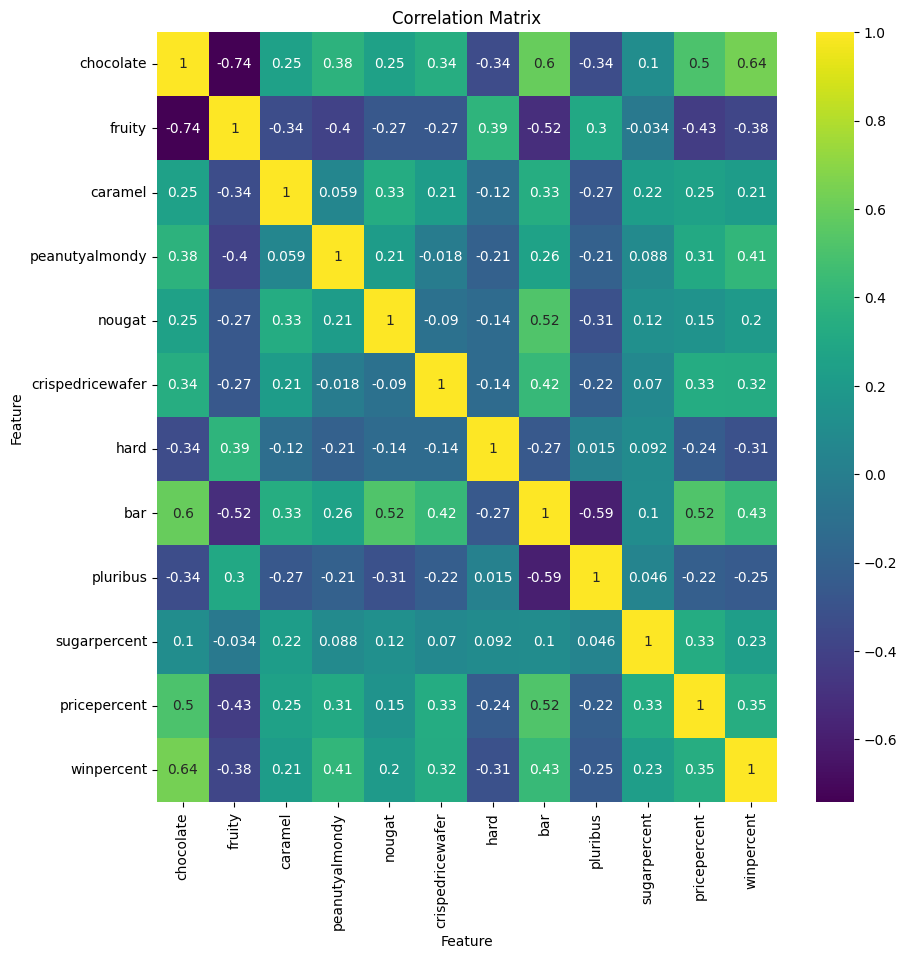

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Calculation of the correlations between the characteristics and the popularity (probability of winning)
correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)

plt.xlabel("Feature")
plt.ylabel("Feature")
plt.title("Correlation Matrix")
plt.show()

/tmp/ipykernel_18/3313131494.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, y[i], y[i], ha='center')  # 'ha' steht für horizontale Ausrichtung ('center' zentriert den Text über dem Balken)


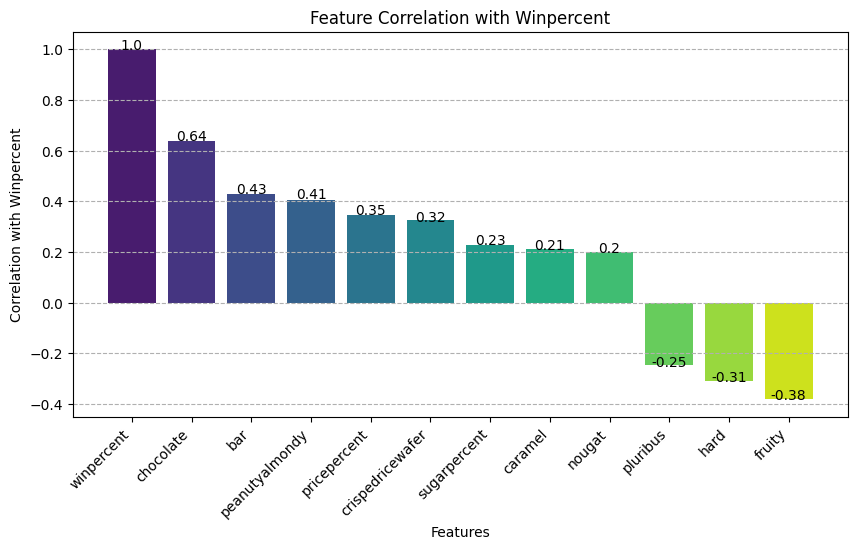

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the correlations with the target variable “winpercent” and sort the data
correlation_with_winpercent = correlation_matrix["winpercent"].sort_values(ascending=False)


# Create the bar chart
plt.figure(figsize=(10, 5))
colors = sns.color_palette("viridis", len(correlation_with_winpercent))
bars = plt.bar(correlation_with_winpercent.index, correlation_with_winpercent, color=colors)

# Add labels to the top of the bars
add_labels_top_of_barchart(correlation_with_winpercent.index, correlation_with_winpercent)

plt.xlabel("Features")
plt.ylabel("Correlation with Winpercent")
plt.title("Feature Correlation with Winpercent")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--")
plt.show()



Correlation to “winpercent”:

Positive correlations:
- Chocolate has a strong positive correlation (+0.64) and is therefore very popular.
- Sweets in bar form (bar) (+0.43) and nut content (peanutyalmondy) (+0.41) also correlate positively.
- Price share (pricepercent) (+0.35) and biscuits/wafers (crispedricewafer) (+0.32) have moderate positive correlations.

Negative correlations:
- Fruity confectionery shows a negative correlation (-0.38) with popularity.
- Hard confectionery (-0.31) and Pluribus-style confectionery (-0.25) are also less popular.

These results suggest that a chocolatey, bar-style candy with a nut or wafer content and a moderate sugar and price content may be best received.

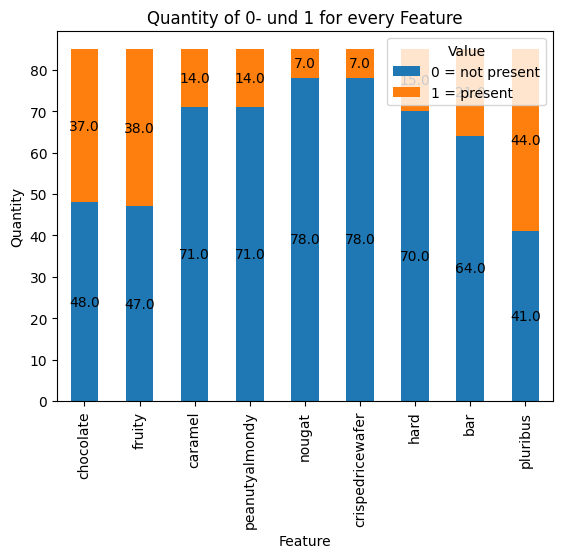

In [11]:
# Clean data of non-properties
df_features = df.drop(columns=["pricepercent","sugarpercent","winpercent"])

# Count and “transpose” property features
counts = df_features.apply(pd.Series.value_counts).T

# Create stacked bar chart
ax = counts.plot(kind="bar", stacked=True)
plt.xlabel("Feature")
plt.ylabel("Quantity")
plt.title("Quantity of 0- und 1 for every Feature")
plt.xticks(rotation=90)
plt.legend(["0 = not present","1 = present"], title="Value")

# Add the labels for the stacked bar chart 
add_label_stacked_bar_chart(axis=ax)

plt.show()

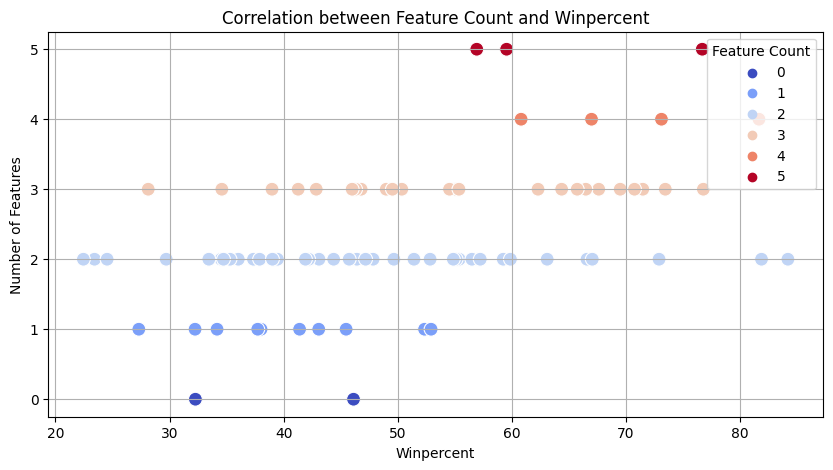

In [12]:
# Selection of the relevant properties (except pricepercent, sugarpercent and winpercent)
df_features = df.copy()
features = df_features.drop(columns=["pricepercent", "sugarpercent", "winpercent"])

# Creation of a new feature that counts the number of active features
df_features["feature_count"] = features.sum(axis=1)

# Visualization of the correlation between feature_count and winpercent
plt.figure(figsize=(10, 5))
sns.scatterplot(x="winpercent", y="feature_count",  data=df_features, hue="feature_count", palette="coolwarm", s=100)

# Add captions and titles
plt.title("Correlation between Feature Count and Winpercent")
plt.ylabel("Number of Features")
plt.xlabel("Winpercent")

plt.legend(title="Feature Count")
plt.grid(True)
plt.show()

In [13]:
df_features.groupby(["feature_count"])["winpercent"].mean()

feature_count
0    39.188795
1    40.460471
2    47.412466
3    55.291107
4    70.628724
5    64.372527
Name: winpercent, dtype: float64

- Sweets with more properties (3 or more) have a higher average probability of winning.
- Confectionery with fewer properties (0 to 2), on the other hand, has a lower average probability of winning.

# 3. Cluster analysis 

In [14]:
# KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# only numerical properties for cluster analysis
numerical_data = df.select_dtypes(include=["int64"])

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Reduction of dimensions for better visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


K-Means: Divides the data into fixed, round clusters. Suitable if clusters are approximately the same size and spherical.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


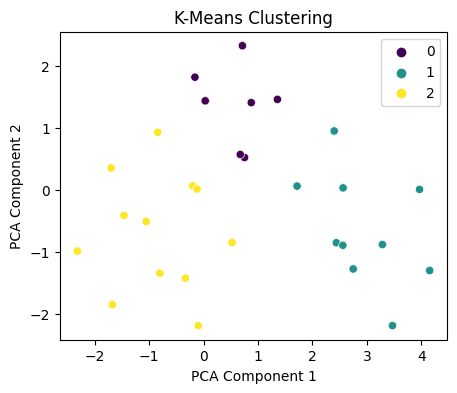

In [15]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Visualization of the K-Means clusters
plt.figure(figsize=(5,4))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()


In [16]:
# Create a DataFrame with the cluster labels
data_with_labels = df.copy()
data_with_labels["KMeans_Cluster"] = kmeans_labels

# Calculation of the mean values of the numerical properties for each cluster
cluster_means = data_with_labels.groupby("KMeans_Cluster").mean()

cluster_means


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
KMeans_Cluster,,,,,,,,,,,,
0,0.941176,0.000000,0.117647,0.411765,0.000000,0.058824,0.000000,0.0,0.764706,0.472706,0.535176,58.095570
1,0.952381,0.000000,0.380952,0.333333,0.333333,0.285714,0.000000,1.0,0.000000,0.527714,0.725952,61.295413
2,0.021277,0.808511,0.085106,0.000000,0.000000,0.000000,0.319149,0.0,0.659574,0.458872,0.330043,42.597799


Cluster 0 (44% winpercent):
- Characteristics: Fruity (69%), hard (27%) and many in a box (70%).
- Less present: Little to no chocolate (16%), caramel (11%), nuts (0%), nougat (0%), wafers (0%), bars (0%).
- Price and sugar: Rather inexpensive (34%) with an average amount of sugar (44%).

Cluster 1 (66% winpercent):
- Characteristics: Very chocolaty (100%), bars (90%), hard (70%), lots of caramel (60%).
- Less present: No fruity (0%), little to no wafers (0%), nuts (10%), nougat (20%).
- Price and sugar: Higher price (74%) and high sugar content (61%).

Cluster 2 (60% winpercent):
- Characteristics: Chocolaty (90%), bar (60%), nougat (65%).
- Less present: No fruity (0%), no wafers (0%), little caramel (10%), no nuts (0%).
- Price and sugar: Medium price (66%) and medium sugar content (50%).

Hierarchical clustering: Forms a tree structure of the data, good for smaller data sets or if the relationship of the clusters is of interest.

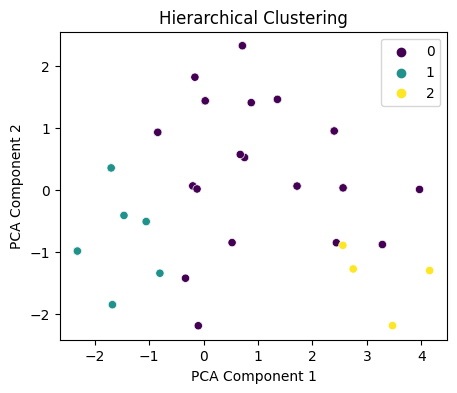

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchisches Clustering
hier_clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=3)
hier_labels = hier_clustering.fit_predict(scaled_data)

# Visualization of the hierarchical clusters
plt.figure(figsize=(5,4))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=hier_labels, palette="viridis")
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [18]:
# Create a DataFrame with the cluster labels
data_with_labels = df.copy()
data_with_labels["Hier_Cluster"] = hier_labels

# Calculation of the mean values of the numerical properties for each cluster
cluster_means = data_with_labels.groupby("Hier_Cluster").mean()

cluster_means


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
Hier_Cluster,,,,,,,,,,,,
0,0.750000,0.025000,0.250000,0.275000,0.0,0.175,0.025000,0.35,0.425000,0.465450,0.579200,54.620640
1,0.026316,0.973684,0.000000,0.000000,0.0,0.000,0.368421,0.00,0.710526,0.471263,0.326000,43.993057
2,0.857143,0.000000,0.571429,0.428571,1.0,0.000,0.000000,1.00,0.000000,0.594143,0.614143,60.051879


Cluster 0 (54.6% winpercent):
- Characteristics: Chocolaty (75%), contains nuts (28%), caramel (25%), many in a box (35%).
- Less present: Few fruity (2.5%), no nougat (0%), few wafers (18%), few hard (2.5%).
- Price and sugar: Average price (57%) and average sugar content (46%).

Cluster 1 (44% winpercent):
- Characteristics: Very fruity (97%), many in a box (71%), hard (37%).
- Less present: Hardly any chocolate (2.6%), no caramel (0%), no nuts (0%), no nougat (0%), no wafers (0%), no bar (0%).
- Price and sugar: Rather inexpensive (32%) and average sugar content (47%).

Cluster 2 (60% winpercent):
- Characteristics: Very chocolaty (86%), bar (100%), contains nougat (100%), contains nuts (43%), contains caramel (57%).
- Less present: No fruity (0%), no wafers (0%), no hard (0%), few in a box (0%).
- Price and sugar: Medium to higher price (61%) and higher sugar content (59%).

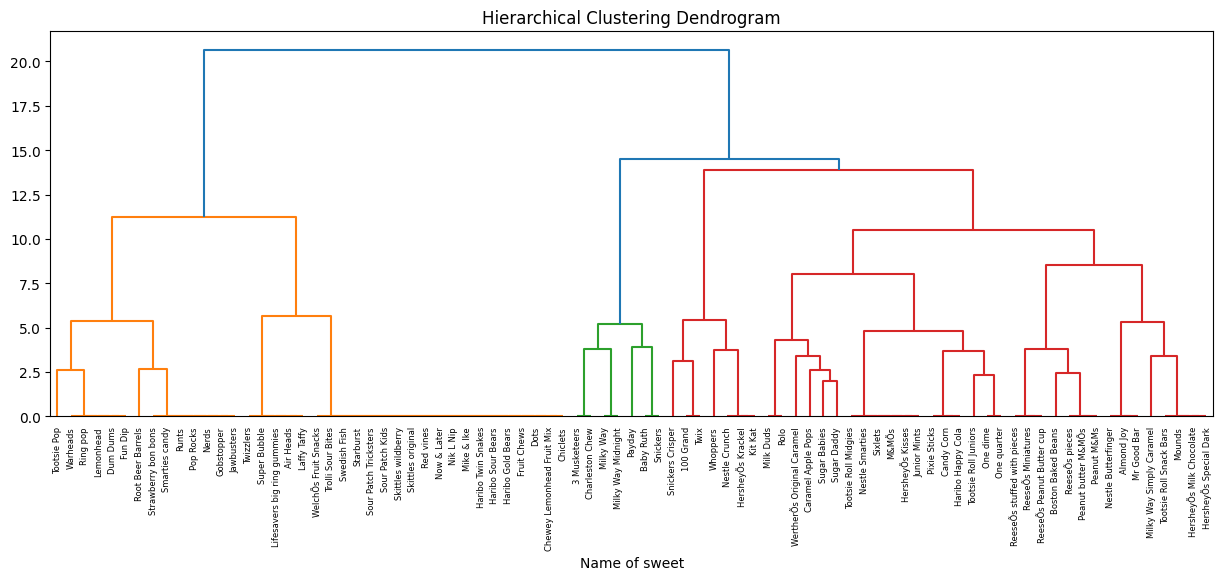

In [19]:
# Set distance_threshold=0 to draw the entire tree
hier_clustering2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

hier_clustering2_fit = hier_clustering2.fit(scaled_data)
hier_clustering2_predict = hier_clustering2.fit_predict(scaled_data)

# Represent the all levels of the dendrogram
plt.figure(figsize=(15,5))
plot_dendrogram(hier_clustering2, labels=numerical_data.index, truncate_mode="level") #p=3 for only 3 levels
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Name of sweet")
plt.xticks(rotation=90)
plt.show()

# 4. Regression analysis 

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Independent variables (characteristics)
X = df.drop(columns=["winpercent"])

# Dependent variable (popularity)
y = df["winpercent"]

# Split data set into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on the test data set
y_pred_linear = linear_reg.predict(X_test)

# Model evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

coefficients_linear = linear_reg.coef_
df_coef = pd.DataFrame(linear_reg.coef_, index=X_train.columns )

# Cross-Validation
cv_scores = cross_val_score(linear_reg, X, y, cv=5, scoring="r2")
cv_mean = cv_scores.mean()

print("MSE: ", mse_linear)
print("R2: ", r2_linear)
print("Cross-Validation R2 (mean):", cv_mean)
print("Coefficients: ","\n", df_coef.sort_values(by=[0], ascending=False))


MSE:  160.982952385319
R2:  0.19699888334669757
Cross-Validation R2 (mean): 0.18003188768829248
Coefficients:  
                           0
chocolate         18.866390
sugarpercent       9.948579
crispedricewafer   8.758688
peanutyalmondy     8.738057
fruity             8.311682
nougat             4.494756
bar                0.087762
caramel           -0.040491
pluribus          -3.940221
pricepercent      -4.242897
hard              -5.056733


MSE (160.98):
- Interpretation: The MSE value of 160.98 is relatively high, which indicates that the model cannot predict the popularity (winpercent) of confectionery very accurately. There are therefore considerable deviations between the actual and predicted values.

R² (0.197):
- Interpretation: An R² value of 0.197 means that around 19.7% of the variance in the popularity of confectionery can be explained by the characteristics investigated. This is a relatively low value, indicating that the model can only explain a small part of the popularity by the given characteristics. There are probably other factors that influence popularity that were not taken into account in this model.

Cross-validation R² (mean): 0.180
- Interpretation: The average R² value from the 5-fold cross-validation is 0.180. This is close to the overall R² value of 0.197, indicating that the model consistently performs similarly across the different validation runs. 

Coefficients of the characteristics:
- Chocolate (18.86): The high positive coefficient indicates that confectionery with chocolate tends to have higher popularity
- Sugar percentile (9.94)
- Wafers (8.75)
- Nuts (8.73)
- Fruity (8.31)
- Nougat (4.49)
- Bar shape (0.08)
- Caramel (-0.04)
- pluribus (-3.94)
- Price percentile (-4.24)
- Hard (-5.05): The negative coefficient indicates that hard confectionery tends to be less popular.

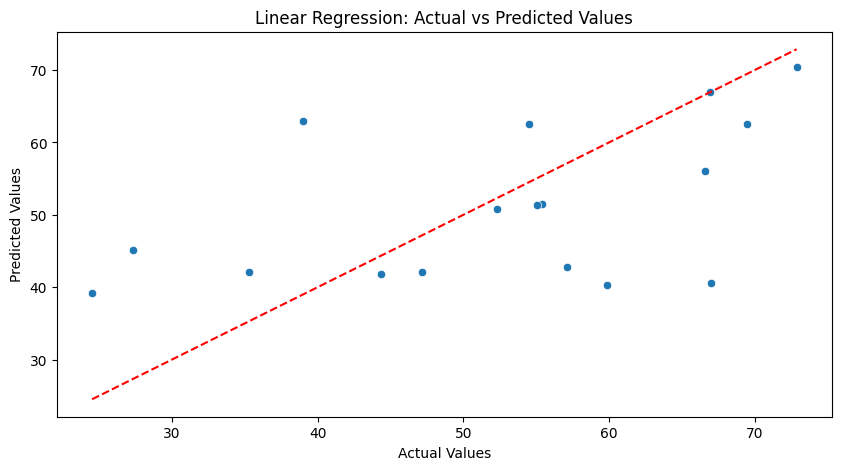

In [21]:
# Visualization: Scatterplot of actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Create and train random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions on the test data set
y_pred_rf = rf_reg.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Cross-Validation
cv_scores_rf = cross_val_score(rf_reg, X, y, cv=5, scoring="r2")
cv_mean_rf = cv_scores_rf.mean()

print("Random Forest Regression:")
print("MSE: ",mse_rf)
print("R2: ", r2_rf)
print("Cross-Validation R2 (mean): ",cv_mean_rf)



Random Forest Regression:
MSE:  142.0567777788046
R2:  0.29140477613110916
Cross-Validation R2 (mean):  0.2525491746917175


MSE (142.06):
- Interpretation: The MSE value of 142 is lower than the previous model, but still shows significant deviations between the actual and predicted values. Even though the model provides better predictions, there is still room for improvement.

R² (0.291):
- Interpretation: The model explains about 29.1% of the variance in the popularity of confectionery, which is an improvement over the previous model, but still indicates other unobserved factors.

Cross-validation R² (mean): 0.253
- Interpretation: The average R² value from the 5-fold cross-validation is 0.253 and confirms the consistency of the model across different data sets. It shows that the model is robust, but still only explains part of the variance.

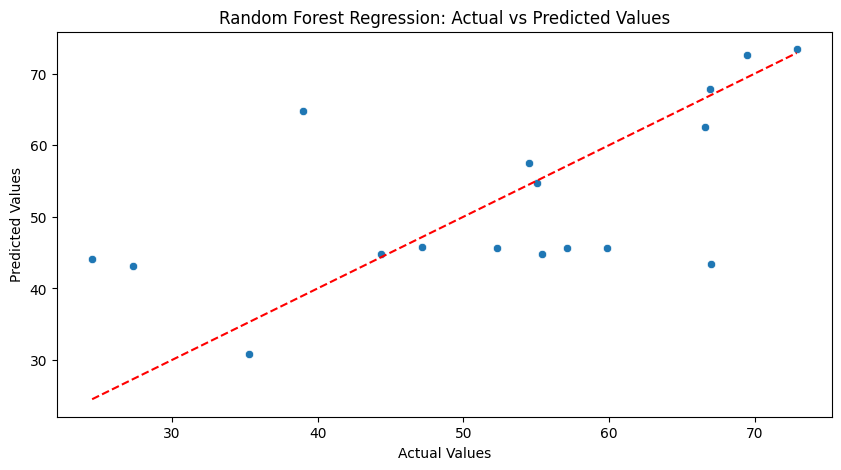

In [23]:
# Visualization: Scatterplot of actual vs. predicted values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Random Forest Regression: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [24]:
# Create a DataFrame with the evaluation metrics for regression models to simplify comparison
evaluation_results = {
    "Metric": ["MSE", "R2", "Cross-Validation R2 (mean)"],
    "Linear Regression": [mse_linear, r2_linear, cv_mean],
    "Random Forest Regression": [mse_rf, r2_rf, cv_mean_rf]
}

# Convert the dictionary into a DataFrame
evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df = evaluation_df.set_index(evaluation_df.columns[0])

evaluation_df


,Linear Regression,Random Forest Regression
Metric,,
MSE,160.982952,142.056778
R2,0.196999,0.291405
Cross-Validation R2 (mean),0.180032,0.252549


Overall, it can be said for both regressions that there are either too few data points or a poor or inappropriate model. The former is acceptable with a total of only 85 entries. 